## Clustering of the digits dataset

We use divisive gater to cluster the digits dataset. Note that we use UMAP to preprocess the data.

In [1]:
from divisivegater.gater import Gater
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from umap import UMAP

Load the digits dataset `X` and the target names `y`

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

Use UMAP to visualize the 
[digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) dataset.

/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/mbr085/anaconda3/envs/divisi

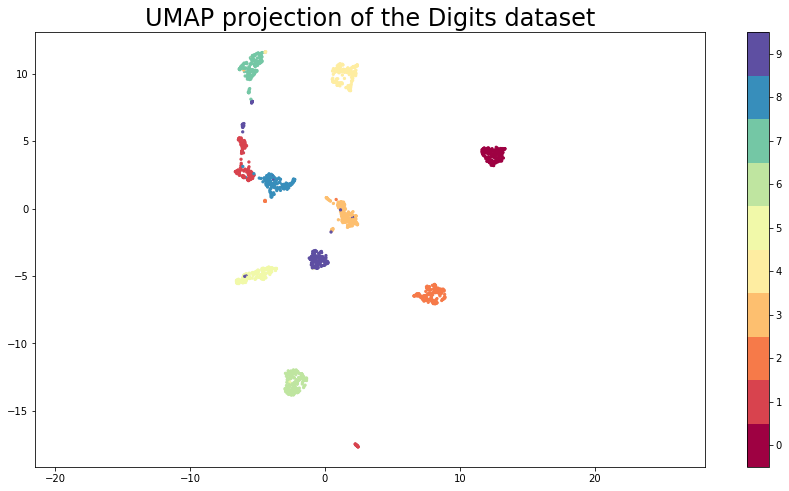

In [3]:
reducer = UMAP(random_state=42)
reducer.fit(X)
Y = reducer.transform(X)

plt.figure(figsize=(15,8))
plt.scatter(Y[:, 0], Y[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

Create a gater object, populate it with the digits data and choose to use all features ('markers'). The `set_markers` method also does preprocessing with UMAP. 

In [4]:
gater = Gater()
gater.data = pd.DataFrame(X)
gater.set_markers(scale=False)

Plot a histogram of how many outliers there will be for different numbers of clusters. 

Be patient. This is where the hard work is done. It takes a few minutes.

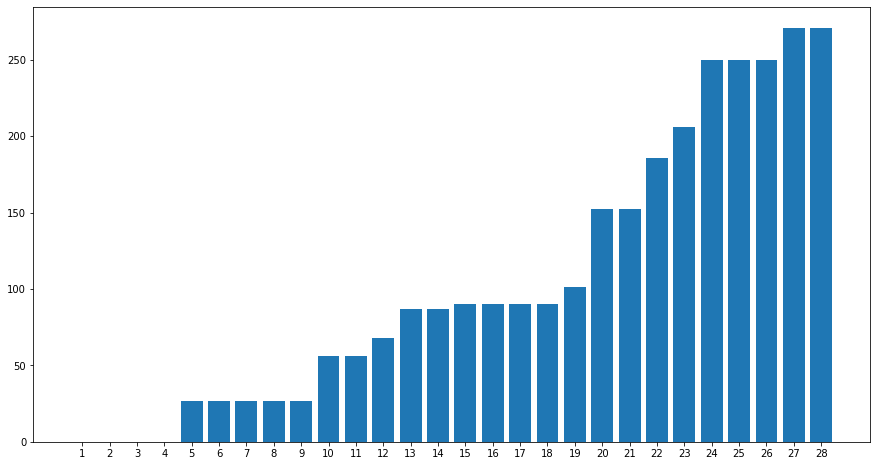

CPU times: user 3min 42s, sys: 1min 57s, total: 5min 39s
Wall time: 1min 28s


In [5]:
%%time
gater.plot_outlier_histogram()

Choose the desired number of clusters.

In [6]:
n_clusters = 11

Plot a histogram of cluster sizes. Note that the right most black cluster consists of outliers.

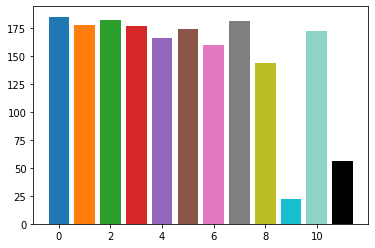

In [7]:
gater.plot_cluster_histogram(n_clusters=n_clusters)

Plot the clusters.

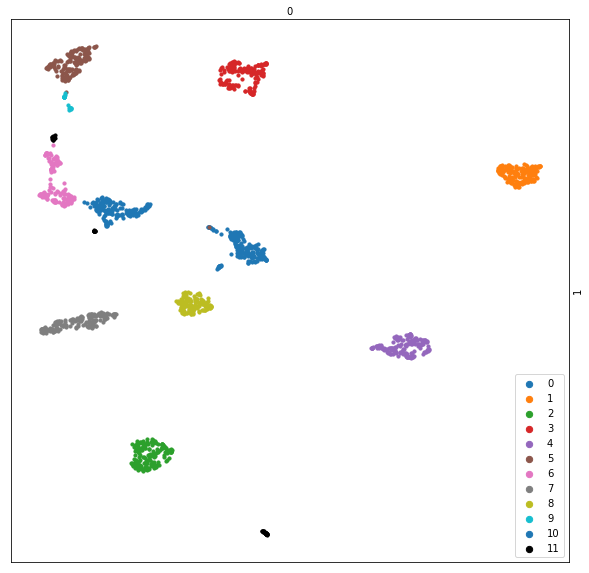

In [8]:
plt.figure(figsize=(10,10))
gater.plot_components(Y=Y, n_components=n_clusters, s=10)